In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

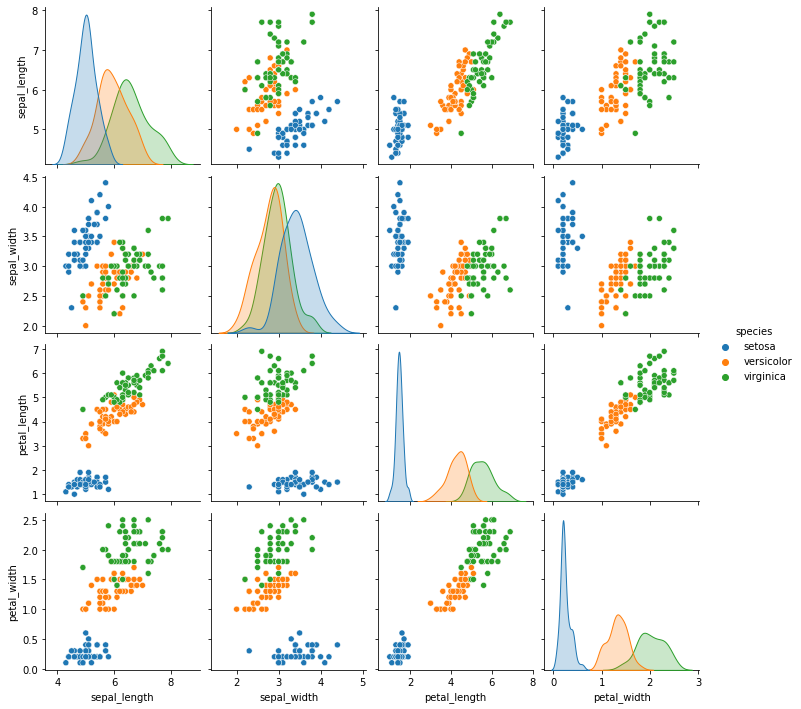

In [5]:
sns.pairplot(df, hue='species');

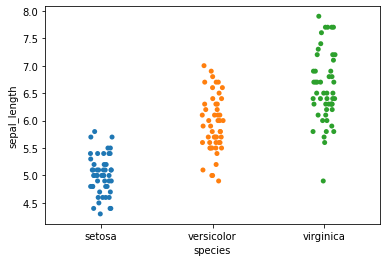

In [6]:
sns.stripplot(x='species', y='sepal_length', data=df);

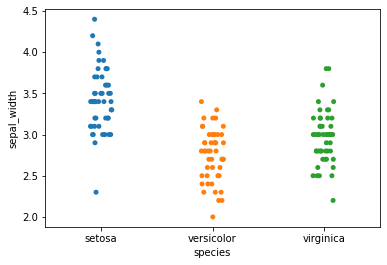

In [7]:
sns.stripplot(x='species', y='sepal_width', data=df);

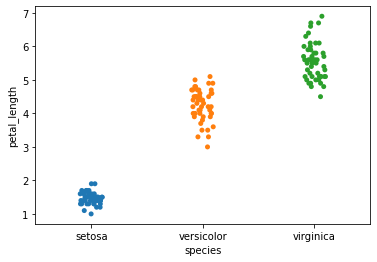

In [8]:
sns.stripplot(x='species', y='petal_length', data=df);

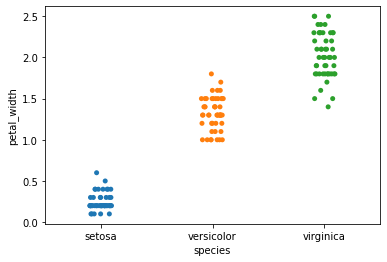

In [9]:
sns.stripplot(x='species', y='petal_width', data=df);

In [10]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

In [11]:
print(X.shape, y.shape)

(150, 2) (150,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                   random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


## KNNeighbours algorithm

In [13]:
from sklearn.neighbors import KNeighborsClassifier

## How to choose K?
* Practioner's rule is sqrt(no. of obvervations)

In [14]:
120**0.5

10.954451150103322

In [15]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9666666666666667

In [16]:
accuracy_score = []
for k in range(2,21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    accuracy_score.append(round(model.score(X_test, y_test),2))

In [17]:
accuracy_score

[0.93,
 0.97,
 0.93,
 0.97,
 0.93,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.93]

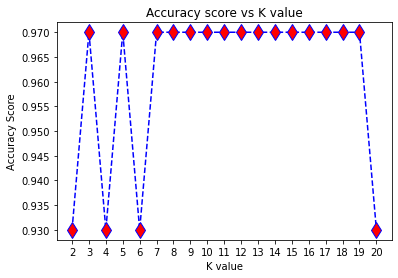

In [18]:
plt.plot(range(2,21), accuracy_score,
        color='b', ls='--', mfc='r', ms=12, marker='d')
plt.title("Accuracy score vs K value")
plt.xticks(range(2,21))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
model.fit(X,y)
scores = cross_val_score(model, X, y)
print(scores.mean())

0.96


In [21]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9666666666666667

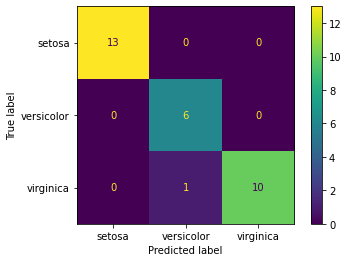

In [22]:
plot_confusion_matrix(model, X_test, y_test);

In [23]:
np.unique(y_test, return_counts=True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([13,  6, 11]))

In [24]:
10/11

0.9090909090909091

In [25]:
from sklearn.metrics import classification_report

In [26]:
6/7

0.8571428571428571

In [27]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [28]:
X, Y = np.meshgrid(
            np.arange(X_test[:,0].min()-1, X_test[:,0].max() +1,0.05),
            np.arange(X_test[:,1].min()-1, X_test[:,1].max() +1,0.05))

In [29]:
print(X.shape, Y.shape)

(84, 152) (84, 152)


In [30]:
#[[petal_length, petal_width]]
y_cont = model.predict(np.c_[X.ravel(), Y.ravel()])

In [31]:
y_cont.shape

(12768,)

In [32]:
y_cont

array(['setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica',
       'virginica'], dtype=object)

In [33]:
y_cont = np.where(y_cont=='setosa',0,y_cont)
y_cont = np.where(y_cont=='versicolor',1,y_cont)
y_cont = np.where(y_cont=='virginica',2,y_cont)

In [34]:
y_cont

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [35]:
Z = y_cont.reshape(X.shape)

In [36]:
Z.shape

(84, 152)

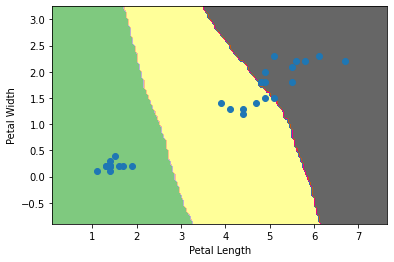

In [37]:
plt.contourf(X,Y,Z, cmap=plt.cm.Accent)
plt.scatter(X_test[:,0], X_test[:,1])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# Parametric models vs Non Parametric models

## Fine tuning of hyper parameters

In [38]:
w = ['uniform','distance']
accuracy_score = []
for i in w:
    model = KNeighborsClassifier(n_neighbors=11, weights=i)
    model.fit(X_train,y_train)
    accuracy_score.append(round(model.score(X_test, y_test),2))

In [39]:
accuracy_score

[0.97, 0.93]

## Use cross_val_score and do hyper parameter tuning

In [40]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values
w = ['uniform','distance']
accuracy_score = []
for i in w:
    model = KNeighborsClassifier(n_neighbors=11, weights=i)
    scores = cross_val_score(model,X,y)
    accuracy_score.append(scores.mean())
print(accuracy_score)

[0.9666666666666668, 0.96]
